In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = 12
target =  np.array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

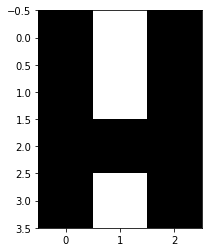

In [3]:
plt.imshow(target.reshape((4, 3)), cmap='Greys')

In [4]:
def plot_pop(P, gen):
    print(f"Generation #{gen}")
    N = len(P)
    fig, axs = plt.subplots(nrows=1, ncols=N)
    for i in range(N):
        axs[i].imshow(P[i].reshape(4, 3), cmap='Greys')
        axs[i].axis('off')

In [5]:
evaluations = 0

def fitness_eval(v):
    global evaluations
    evaluations += 1
    return l - np.abs(v - target).sum()

def init(n):
    return np.random.randint(low=0, high=1+1, size=(n, l))

def selection(fitness):
    prob = np.array(fitness)
    prob = prob / prob.sum()
    return np.random.choice(len(P), p=prob)

def mutation(P, pm):
    Pnew = np.copy(P)
    for i in range(len(P)):
        idx = np.random.randint(low=0, high=l)
        if np.random.rand() < pm:
            v = np.random.randint(low=0, high=1+1)
            Pnew[i, idx] = v
    return Pnew

def crossover_point(parent1, parent2):
    p = np.random.randint(low=0, high=l)
    child1 = np.concatenate((parent1[:p], parent2[p:]))
    child2 = np.concatenate((parent2[:p], parent1[p:]))
    return child1, child2
    
def crossover(P, fitness, pc):
    Pnew = list()
    for i in range(len(P) // 2):
        parent1 = P[selection(fitness)]
        parent2 = P[selection(fitness)]
        if np.random.rand() < pc:
            child1, child2 = crossover_point(parent1, parent2)
            Pnew.append(child1)
            Pnew.append(child2)
        else:
            Pnew.append(parent1)
            Pnew.append(parent2)
    return np.array(Pnew)

Generation #1
Generation #1
Found  52
Generation #52


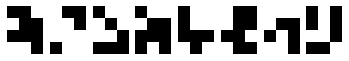

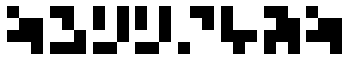

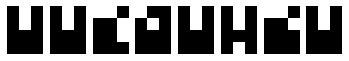

In [6]:
np.random.seed(1)
history = list()

P = init(8)
plot_pop(P, 1)

for generation in range(695):
    fitness = np.array([fitness_eval(v) for v in P])
    history.append(fitness)
    if np.any(fitness == l):
        print("Found ", generation+1)
        break
    P = crossover(P, fitness, 0.9)
    P = mutation(P, 0.3)
    if generation % 100 == 0:
        plot_pop(P, generation + 1)
plot_pop(P, generation + 1)

In [14]:
fitness_max = np.max(history, axis=1)
fitness_min = np.min(history, axis=1)
fitness_mean = np.mean(history, axis=1)

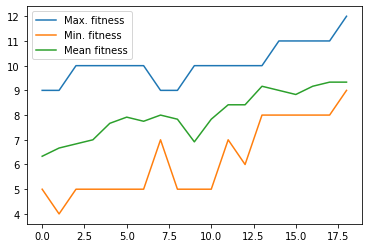

In [60]:
plt.plot(fitness_max, label="Max. fitness")
plt.plot(fitness_min, label="Min. fitness")
plt.plot(fitness_mean, label="Mean fitness")
plt.legend()